In [2]:
from numpy import array
import networkx as nx

## Grammar
/!\ Ne pas retranscrire en Ocaml, il s'agit d'une version python de la grammaire d'Arbogen.

In [3]:
class Elem(str):
    
    def __init__(self, string):
        self = string
        
    def __str__(self):
        return self

In [4]:
class Component():
    
    def __init__(self, string, rule_name):
        string = string.replace(' ','').split('*')
        self.int = 0
        self.elements = []
        for s in string:
            if s[:2] == '<z':
                if s[2] == '>':
                    self.int += 1
                else:
                    self.int += int(s[3])
            if s == rule_name:
                self.elements.append(Elem(s))     
                
    def __str__(self):
        if self.int == 0:
            string = "Eps * "
        elif self.int == 1:
            string = "<z> * "
        else:
            string = "<z^" + str(self.int) + "> * "
        for element in self.elements:
            string += str(element) + " * "
        return string[:-3]

In [5]:
class Rule:
    
    def __init__(self, string):
        self.name,string = string.replace(' ','').split('=')
        self.components = []
        for s in string.split('+'):
            self.components.append(Component(s,self.name))
    
    def __str__(self):
        string = self.name + ' = '
        for component in self.components:
            string += str(component) + " + "
        return string[:-3]

In [6]:
R = Rule("B = <z^0> + <z> * B + <z^2> * B * B")
print(R)

B = Eps + <z> * B + <z^2> * B * B


## Utils

In [7]:
def number_of_recursions(component):
    return len(component.elements)

def number_of_nodes(component):
    return component.int

In [8]:
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

In [9]:
def next_partition_with_factor(base):
    modification = False
    duplicate = 1
    den = 1
    for i in range(0, len(base) - 1):
        if not modification and base[i] - 1 >= base[i + 1] + 1:
            base[i] -= 1
            base[i + 1] += 1
            modification = True
        if base[i] == base[i+1]:
            duplicate += 1
            den *= duplicate
        else:
            duplicate = 1
    return modification,factorial(len(base))//den, base
                

    

## Count

In [10]:
def count(N,rule):
    
    iFile = open("backup.cnt", 'r')
    string = iFile.read().split('\n')
    iFile.close()
    
    backup = [0] * max(len(string)*2,1000)
    number_of_elements = 0
    for i in range(len(string) - 1):
        backup[i] = string[i]
        number_of_elements += 1
    
    oFile = open("backup.cnt",'a')
    for n in range(number_of_elements,N + 1):
        Bn = 0
        for component in rule.components:
            
            if n - number_of_nodes(component) >= 0:
                if number_of_recursions(component) == 0 and number_of_nodes(component) == n:
                    Bn += 1
                else:
                    base = [n - number_of_nodes(component)] + [0]*(number_of_recursions(component) - 1)
                    modification = True
                    if number_of_nodes(component) == n:
                        factor = 1
                    else: factor = number_of_recursions(component)
                    while modification:
                        product = 1
                        for e in base:
                            product *= backup[e]
                        Bn += product * factor
                        modification, factor, base =  next_partition_with_factor(base)
        
        if len(backup) - 1== number_of_elements:
            backup_increased = [0]*2*number_of_elements
            for i in range(number_of_elements):
                backup_increased[i] = backup[i]
            backup = backup_increased.copy()
        backup[number_of_elements] = Bn
        number_of_elements += 1
      
    print(backup[N])
    return backup

In [11]:
R = Rule("B = <z^0> + <z^1> + <z> * B + <z> * B * B")
X = count(1001,R)

620148005320594349761992409216291369771968706850462192980513954752087239802719677217667352364366666861791883765039099622964473647411041927825066904204260540047168174557271047079298939760679978779482995169680183396701712462431459571772268204554597740005633903517910965643523482334816842598251792032310702898639590951009609042931715971420246856449684341121699120612122681566452704399824402730341822694616456660453947988193542466819137998878908625542928013238962863345483473517723017958524935400995823845574078057902623635154098515431561414821637496848346446384889314308741624030751620437384096134269347594267238378554841409451705588717033780306267473846273911885193830823136850168996680646295149020953552232903362950578820081809096879141047113036442838688511717774176579293620049268539246071503076671024372619


## Unranking 

In [12]:
def factor_of_partition(n,duplicates):
    denominator = 1
    for e in duplicates:
        denominator *= e
    return factorial(n)//denominator

In [13]:
factor_of_partition(4,[2,3])*2

8

In [14]:
def who_and_how(part):
    who = [part[0]]
    how = [1]
    for i in range(1, len(part)):
        if part[i] == who[0]:
            how[0] += 1
        else:
            who = [part[i]] + who
            how = [1] + how
    return who,how

In [15]:
def switch_to_n_combination(part,n):
    who,how = who_and_how(part)
    if len(how) == 1: 
        return part
    combination = [0]*len(part)
    
    
    for i in range(len(part)):
        q = 0
        step = factor_of_partition(len(part) - i - 1, how)  
        while n - step*how[q] >= 0:
            n -= step*how[q]
            q += 1
        combination[i] = who[q]
        how[q] -= 1
        if how[q] == 0:
            del how[q]
            del who[q]
    return combination

In [16]:
for i in range(0,24):
    print(switch_to_n_combination([1,2,3,4],i))

[4, 3, 2, 1]
[4, 3, 1, 2]
[4, 2, 3, 1]
[4, 2, 1, 3]
[4, 1, 3, 2]
[4, 1, 2, 3]
[3, 4, 2, 1]
[3, 4, 1, 2]
[3, 2, 4, 1]
[3, 2, 1, 4]
[3, 1, 4, 2]
[3, 1, 2, 4]
[2, 4, 3, 1]
[2, 4, 1, 3]
[2, 3, 4, 1]
[2, 3, 1, 4]
[2, 1, 4, 3]
[2, 1, 3, 4]
[1, 4, 3, 2]
[1, 4, 2, 3]
[1, 3, 4, 2]
[1, 3, 2, 4]
[1, 2, 4, 3]
[1, 2, 3, 4]


In [17]:
def unranking(size,index,rule,draw = False):
    
    backup = count(size,rule)
    G = nx.Graph()
    global nodes
    nodes = 0
    colors = []
    def aux(size,index,parent):
        global nodes
        G.add_node(nodes)
        current = nodes
        if current == 0: colors.append("black")
        nodes += 1
        
            
        cursor = 0
        for component in rule.components:
            if number_of_recursions(component) == 0 and number_of_nodes(component) == size:
                if parent != None:
                    G.add_edge(parent,current)
                    colors.append("red")
                return
            if number_of_recursions(component) != 0 and number_of_nodes(component) <= size:
                part = [size - number_of_nodes(component)] + [0]*(number_of_recursions(component) - 1)
                modification = True
                who,how = who_and_how(part)
                factor = factor_of_partition(len(part),how)
                while modification:
                    product = 1
                    for e in part:
                        product *= backup[e]
                    if factor*product - 1>= index :
                        index -= cursor
                        nieme_combination = index//product
                        if parent != None:
                            G.add_edge(parent,current)
                            colors.append("blue")
                        
                        combination = switch_to_n_combination(part,nieme_combination)
                        index -= nieme_combination * product
                        for e in combination:
                            product = product // backup[e]
                            aux(e,index//product,current)
                            index %= product
                        return
                    else:
                        index -= factor*product
                        modification,factor,part = next_partition_with_factor(part)
    aux(size,index,None)
    print(colors)
    if draw: nx.draw(G,node_color = colors)
                    

14
['black', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'red']


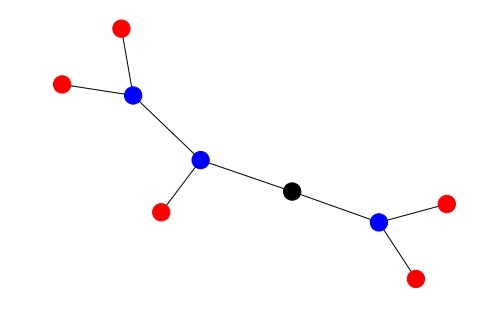

In [26]:
nodes = 0
R = Rule("B = <z^0> + <z> * B * B")
unranking(4,13,R,True)